Homework 2
# **Homework 2** - Analyzing commodity prices

Pick the XLSX file link for **monthly** pink sheet from [https://www.worldbank.org/en/research/commodity-markets](https://www.worldbank.org/en/research/commodity-markets)


1. Load standart libraries
2. Load statistical libraries for better graphics
3. Load the data
4. (convert all data cells to numbers : This is because of worldbank data has ".." for some cells and confuses Python dataframes
---------Just copy paste until this step------------------------
---------Now change the code given for your analyze periods and columns
5. Dissect the data temporally and in commodities
6. Create correlation matrix
7. Create pair graphs
8. Analyze




In [1]:
# 1. load standard libraries
%pylab inline
import pandas as pd

Populating the interactive namespace from numpy and matplotlib


In [2]:
# 2 load extra statistical libraries for better visuals
import statsmodels.api as sm          # for correlation matrix
import seaborn as sns                 #for pair plots

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [20]:
# 3 Load the data
wb_pinksheet="http://pubdocs.worldbank.org/en/561011486076393416/CMO-Historical-Data-Monthly.xlsx"
prices=pd.read_excel(wb_pinksheet,sheet_name="Monthly Prices", skiprows=6)

In [23]:
#  ------------ This step is not relevant to you, for cleaning data -----------------------------------
price_set=prices.drop(columns=["LAMB"])                     #LAMB column is mostly empty, let's delete it. Run ONCE
dataselected=price_set.iloc[-120:,1:71].applymap(float);

In [22]:
# See the last two rows of the data
dataselected.tail(2)

,CRUDE_PETRO,CRUDE_BRENT,CRUDE_DUBAI,CRUDE_WTI,COAL_AUS,COAL_SAFRICA,NGAS_US,NGAS_EUR,NGAS_JP,iNATGAS,COCOA,COFFEE_ARABIC,COFFEE_ROBUS,TEA_AVG,TEA_COLOMBO,TEA_KOLKATA,TEA_MOMBASA,COCONUT_OIL,GRNUT,FISH_MEAL,GRNUT_OIL,PALM_OIL,PLMKRNL_OIL,SOYBEANS,SOYBEAN_OIL,SOYBEAN_MEAL,RAPESEED_OIL,SUNFLOWER_OIL,BARLEY,MAIZE,SORGHUM,RICE_05,RICE_25,RICE_A1,RICE_05_VNM,WHEAT_US_SRW,WHEAT_US_HRW,BANANA_EU,BANANA_US,ORANGE,BEEF,CHICKEN,SHRIMP_MEX,SUGAR_EU,SUGAR_US,SUGAR_WLD,TOBAC_US,LOGS_CMR,LOGS_MYS,SAWNWD_CMR,SAWNWD_MYS,PLYWOOD,COTTON_A_INDX,RUBBER_TSR20,RUBBER1_MYSG,PHOSROCK,DAP,TSP,UREA_EE_BULK,POTASH,ALUMINUM,IRON_ORE,COPPER,LEAD,Tin,NICKEL,Zinc,GOLD,PLATINUM,SILVER
726,42.066667,42.81,42.64,40.75,51.56,56.60,1.7227,1.801035,7.787744,34.757612,2.10174,3.235941,1.492307,3.030141,3.320000,3.990422,1.7800,888.31,1985.23,1486.92,1876.87,694.16,683.93,381.070000,821.11,355.16,890.21,831.95,80.376771,152.554937,174.936597,480.0,467.0,459.70,444.19,212.742175,198.415818,0.861384,1.270412,0.660793,4.698817,1.523392,12.517832,0.374270,0.586870,0.270727,4562.236465,401.135,278.885142,606.846816,692.7755,511.476308,1.510606,1.2003,1.4838,75.00,305.10,262.20,214.4,202.5,1643.81,108.52,6372.46,1817.93,17469.92,13402.30,2177.20,1846.51,864.64,20.647
727,43.443333,44.26,43.71,42.36,50.34,57.38,2.2933,2.861897,7.787744,46.729925,2.34126,3.599042,1.602318,3.155081,3.377145,4.085598,2.0025,981.30,1297.14,1479.92,1876.96,760.30,739.17,384.552363,866.94,374.95,921.55,860.00,80.376771,143.712884,189.487089,505.0,486.0,480.85,448.91,205.132561,198.415818,0.895318,1.250433,0.616571,4.632348,1.496496,12.566334,0.386255,0.603845,0.288805,4545.810169,413.980,280.839116,629.127414,719.5240,514.997742,1.541911,1.3214,1.7032,76.88,341.88,276.25,249.5,202.5,1737.26,121.07,6498.94,1935.73,17650.03,14537.75,2410.05,1968.63,940.33,27.003


In [24]:
# see the first two rows of the dataselected
# head command ->  head(#number of rows)
dataselected.head(2)

,CRUDE_PETRO,CRUDE_BRENT,CRUDE_DUBAI,CRUDE_WTI,COAL_AUS,COAL_SAFRICA,NGAS_US,NGAS_EUR,NGAS_JP,iNATGAS,COCOA,COFFEE_ARABIC,COFFEE_ROBUS,TEA_AVG,TEA_COLOMBO,TEA_KOLKATA,TEA_MOMBASA,COCONUT_OIL,GRNUT,FISH_MEAL,GRNUT_OIL,PALM_OIL,PLMKRNL_OIL,SOYBEANS,SOYBEAN_OIL,SOYBEAN_MEAL,RAPESEED_OIL,SUNFLOWER_OIL,BARLEY,MAIZE,SORGHUM,RICE_05,RICE_25,RICE_A1,RICE_05_VNM,WHEAT_US_SRW,WHEAT_US_HRW,BANANA_EU,BANANA_US,ORANGE,BEEF,CHICKEN,SHRIMP_MEX,SUGAR_EU,SUGAR_US,SUGAR_WLD,TOBAC_US,LOGS_CMR,LOGS_MYS,SAWNWD_CMR,SAWNWD_MYS,PLYWOOD,COTTON_A_INDX,RUBBER_TSR20,RUBBER1_MYSG,PHOSROCK,DAP,TSP,UREA_EE_BULK,POTASH,ALUMINUM,IRON_ORE,COPPER,LEAD,Tin,NICKEL,Zinc,GOLD,PLATINUM,SILVER
608,76.116241,77.786818,75.270476,75.291429,94.90,85.82,3.9039,8.28,11.03,94.242165,2.875045,4.909909,1.791915,2.996026,3.348809,3.181770,2.4575,1275.0,1250.00,1182.14,1426.71,948.88,1259.66,468.26,1035.26,409.73,1032.57,1114.0,168.119804,205.89464,184.904629,476.5,448.0,412.00,457.678,276.312398,271.673598,0.974085,0.880498,1.046851,3.390926,1.934554,11.732988,0.439011,0.841503,0.496260,4358.350000,432.0195,310.912098,827.122438,875.964375,575.350571,2.308899,3.362524,3.533381,125.0,506.00,428.0,308.75,312.5,2162.341,140.627273,7709.295,2184.227,22701.136,22643.409,2151.409,1270.977,1591.75,20.5498
609,81.719365,82.918095,80.340476,81.899524,97.45,90.99,3.4315,8.29,11.13,88.620925,2.927515,4.798135,1.879879,3.034730,3.372414,3.246775,2.4850,1412.0,1280.95,1197.99,1471.32,1025.83,1420.95,495.79,1146.75,417.77,1149.51,1284.0,174.624226,235.81432,201.039298,486.0,457.0,428.25,477.680,267.493918,270.232196,1.003343,0.916324,1.086324,3.374391,1.912049,11.757238,0.454100,0.842879,0.542557,4357.491667,458.8815,316.361621,867.419513,880.174500,578.231960,2.789947,3.847952,3.924762,125.0,557.25,455.0,332.50,312.5,2346.570,148.480952,8292.405,2379.667,26342.619,23807.381,2372.143,1342.024,1688.69,23.3933


In [26]:
# make sure all columns are float or number otherwise correlation will not perform use .dtypes extension to check it
dataselected.dtypes

CRUDE_PETRO    float64
CRUDE_BRENT    float64
CRUDE_DUBAI    float64
CRUDE_WTI      float64
COAL_AUS       float64
                ...   
NICKEL         float64
Zinc           float64
GOLD           float64
PLATINUM       float64
SILVER         float64
Length: 70, dtype: object

In [27]:
#see the column names
dataselected.columns

Index(['CRUDE_PETRO', 'CRUDE_BRENT', 'CRUDE_DUBAI', 'CRUDE_WTI', 'COAL_AUS',
       'COAL_SAFRICA', 'NGAS_US', 'NGAS_EUR', 'NGAS_JP', 'iNATGAS', 'COCOA',
       'COFFEE_ARABIC', 'COFFEE_ROBUS', 'TEA_AVG', 'TEA_COLOMBO',
       'TEA_KOLKATA', 'TEA_MOMBASA', 'COCONUT_OIL', 'GRNUT', 'FISH_MEAL',
       'GRNUT_OIL', 'PALM_OIL', 'PLMKRNL_OIL', 'SOYBEANS', 'SOYBEAN_OIL',
       'SOYBEAN_MEAL', 'RAPESEED_OIL', 'SUNFLOWER_OIL', 'BARLEY', 'MAIZE',
       'SORGHUM', 'RICE_05', 'RICE_25', 'RICE_A1', 'RICE_05_VNM',
       'WHEAT_US_SRW', 'WHEAT_US_HRW', 'BANANA_EU', 'BANANA_US', 'ORANGE',
       'BEEF', 'CHICKEN', 'SHRIMP_MEX', 'SUGAR_EU', 'SUGAR_US', 'SUGAR_WLD',
       'TOBAC_US', 'LOGS_CMR', 'LOGS_MYS', 'SAWNWD_CMR', 'SAWNWD_MYS',
       'PLYWOOD', 'COTTON_A_INDX', 'RUBBER_TSR20', 'RUBBER1_MYSG', 'PHOSROCK',
       'DAP', 'TSP', 'UREA_EE_BULK', 'POTASH', 'ALUMINUM', 'IRON_ORE',
       'COPPER', 'LEAD', 'Tin', 'NICKEL', 'Zinc', 'GOLD', 'PLATINUM',
       'SILVER'],
      dtype='object')

In [28]:
#Let's see the whole correlation matrix
dataselected.corr()

,CRUDE_PETRO,CRUDE_BRENT,CRUDE_DUBAI,CRUDE_WTI,COAL_AUS,COAL_SAFRICA,NGAS_US,NGAS_EUR,NGAS_JP,iNATGAS,COCOA,COFFEE_ARABIC,COFFEE_ROBUS,TEA_AVG,TEA_COLOMBO,TEA_KOLKATA,TEA_MOMBASA,COCONUT_OIL,GRNUT,FISH_MEAL,GRNUT_OIL,PALM_OIL,PLMKRNL_OIL,SOYBEANS,SOYBEAN_OIL,SOYBEAN_MEAL,RAPESEED_OIL,SUNFLOWER_OIL,BARLEY,MAIZE,SORGHUM,RICE_05,RICE_25,RICE_A1,RICE_05_VNM,WHEAT_US_SRW,WHEAT_US_HRW,BANANA_EU,BANANA_US,ORANGE,BEEF,CHICKEN,SHRIMP_MEX,SUGAR_EU,SUGAR_US,SUGAR_WLD,TOBAC_US,LOGS_CMR,LOGS_MYS,SAWNWD_CMR,SAWNWD_MYS,PLYWOOD,COTTON_A_INDX,RUBBER_TSR20,RUBBER1_MYSG,PHOSROCK,DAP,TSP,UREA_EE_BULK,POTASH,ALUMINUM,IRON_ORE,COPPER,LEAD,Tin,NICKEL,Zinc,GOLD,PLATINUM,SILVER
CRUDE_PETRO,1.000000,0.998315,0.998262,0.992432,0.548917,0.601336,0.654373,0.903499,0.849957,0.886888,0.122628,0.492319,0.582331,0.202950,-0.050203,0.316672,0.017047,0.096204,0.363969,0.357313,0.604571,0.735073,0.292093,0.838845,0.801165,0.716871,0.775583,0.732386,0.838607,0.808877,0.785602,0.606105,0.512527,0.545455,0.568194,0.773802,0.870930,0.713078,-0.514362,0.422389,-0.152129,0.386712,0.228230,0.893423,0.168415,0.609904,-0.226913,0.891061,0.695570,0.741539,0.770451,0.780265,0.514589,0.706221,0.698705,0.614532,0.684748,0.738123,0.733884,0.733885,0.577698,0.773985,0.835318,0.476215,0.719481,0.731686,-0.211140,0.367415,0.853414,0.734648
CRUDE_BRENT,0.998315,1.000000,0.998753,0.984301,0.561095,0.613090,0.642208,0.904963,0.853315,0.883079,0.114755,0.495448,0.585403,0.205305,-0.063148,0.313300,0.038449,0.090933,0.391532,0.349064,0.629988,0.741282,0.288710,0.849543,0.814709,0.711456,0.790808,0.748995,0.855389,0.828227,0.804551,0.626963,0.536636,0.561495,0.580182,0.785624,0.878189,0.718382,-0.504839,0.420971,-0.166257,0.372110,0.199836,0.891966,0.178771,0.617072,-0.248795,0.893715,0.720135,0.739110,0.772070,0.795829,0.515487,0.719407,0.711055,0.637273,0.694285,0.751935,0.750041,0.750265,0.585083,0.783263,0.842946,0.476620,0.718723,0.733081,-0.215148,0.393052,0.857452,0.756568
CRUDE_DUBAI,0.998262,0.998753,1.000000,0.984176,0.554823,0.605920,0.638682,0.903278,0.858977,0.881165,0.100212,0.481127,0.572590,0.197581,-0.062239,0.310657,0.026607,0.070574,0.392931,0.351227,0.628119,0.728132,0.267873,0.839003,0.801742,0.710193,0.779005,0.733607,0.847296,0.816220,0.796683,0.625319,0.536861,0.567751,0.573326,0.780691,0.873400,0.705178,-0.495282,0.404118,-0.144203,0.381989,0.214373,0.882950,0.166474,0.600833,-0.244896,0.885489,0.708402,0.727546,0.761185,0.786944,0.499719,0.705402,0.696500,0.626759,0.688908,0.742299,0.750090,0.745046,0.576389,0.776911,0.837659,0.465875,0.706885,0.728064,-0.210617,0.394496,0.846893,0.742873
CRUDE_WTI,0.992432,0.984301,0.984176,1.000000,0.521454,0.575277,0.679092,0.891595,0.825892,0.887679,0.156081,0.495704,0.583086,0.203947,-0.020599,0.323861,-0.019344,0.130550,0.294167,0.369876,0.540700,0.727166,0.320340,0.816338,0.775253,0.722612,0.744737,0.702911,0.799187,0.768300,0.741502,0.552548,0.450370,0.494778,0.541616,0.743043,0.849481,0.707588,-0.541438,0.440024,-0.142715,0.404890,0.274954,0.896778,0.156447,0.604736,-0.177926,0.883994,0.643877,0.751807,0.770212,0.745249,0.524544,0.683422,0.678560,0.566618,0.660832,0.708518,0.687837,0.693326,0.563797,0.750750,0.813993,0.482031,0.726436,0.725721,-0.204564,0.301994,0.846226,0.690884
COAL_AUS,0.548917,0.561095,0.554823,0.521454,1.000000,0.970492,0.422842,0.507241,0.304082,0.504285,-0.218655,0.448418,0.484617,0.361201,0.253348,0.097704,0.297885,0.331889,0.309113,-0.119557,0.375829,0.583826,0.501505,0.407138,0.645146,0.080277,0.671540,0.557494,0.480771,0.500853,0.408544,0.417598,0.396844,0.194005,0.594801,0.382118,0.399295,0.461202,-0.059823,0.369324,-0.406595,0.161393,-0.216535,0.528296,0.556666,0.563274,-0.258877,0.500151,0.593594,0.285405,0.279844,0.577000,0.700750,0.691953,0.679677,0.370499,0.505219,0.572405,0.458155,0.263533,0.852828,0.577589,0.734175,0.735020,0.730538,0.586200,0.378079,0.240342,0.457594,0.571494
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,..

In [106]:
# ----------------now your turn ---------------------------------------------------
#---------------------------------------------------------------------------------

# 5. Dissect the data temporally and in commodities

# The columns you want to see
columns_selected=["SUGAR_EU","CRUDE_BRENT","RUBBER_TSR20","POTASH","NGAS_JP"]    # pick 5 commodities

LAST_NUMBER_OF_MONTHS=20                                                         # last 40 months
EXCLUDE_LAST_NUMBER_OF_MONTHS=1                                                  # until the last month

data_analyzed=dataselected[columns_selected][-LAST_NUMBER_OF_MONTHS:-EXCLUDE_LAST_NUMBER_OF_MONTHS]



In [107]:
data_analyzed.head(2)   #just two rows

,SUGAR_EU,CRUDE_BRENT,RUBBER_TSR20,POTASH,NGAS_JP
708,0.372964,59.27,1.3562,215.5,12.007293
709,0.370711,64.13,1.3987,215.5,11.806582


In [109]:
# 6. Create correlation matrix
data_analyzed.corr()

,SUGAR_EU,CRUDE_BRENT,RUBBER_TSR20,POTASH,NGAS_JP
SUGAR_EU,1.000000,0.382653,0.363644,-0.352495,0.102076
CRUDE_BRENT,0.382653,1.000000,0.935622,0.524929,0.364194
RUBBER_TSR20,0.363644,0.935622,1.000000,0.550714,0.360560
POTASH,-0.352495,0.524929,0.550714,1.000000,0.142720
NGAS_JP,0.102076,0.364194,0.360560,0.142720,1.000000


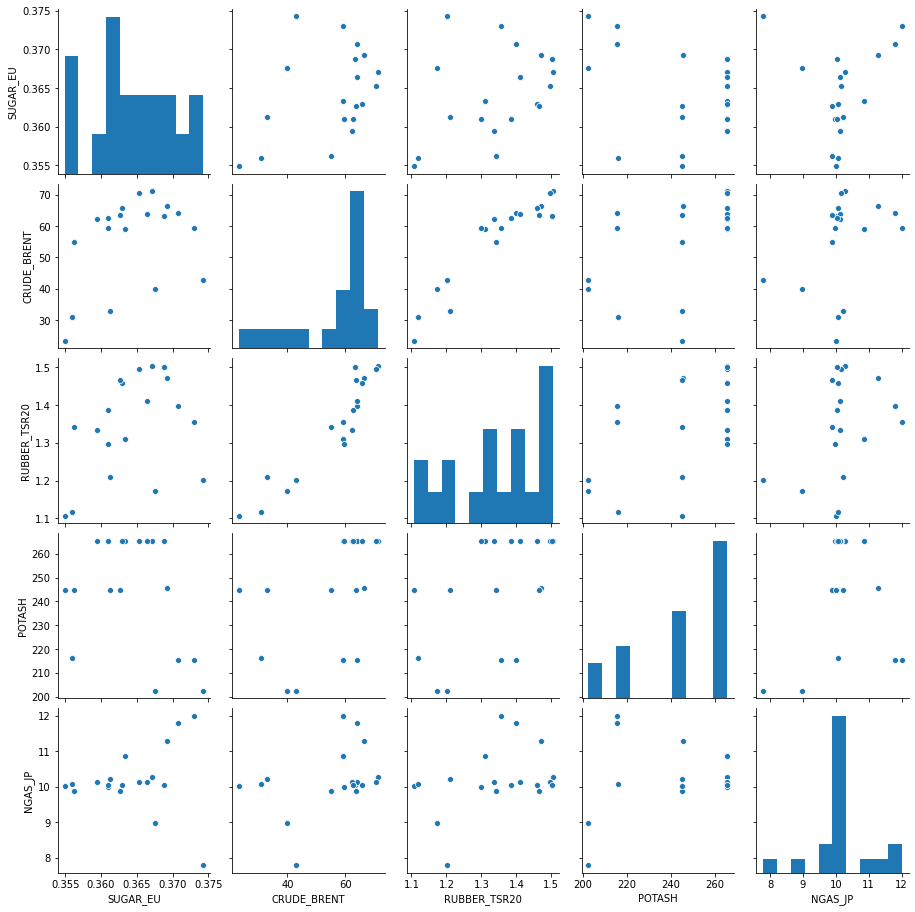

In [110]:
# 7. Create pair graphs
sns.pairplot(data_analyzed)


In [111]:
#----------------------------------------------------------------------------
# Extras
#-----------------------------------------------------------------------------
# a much more colorfull one
cor=data_analyzed.corr()
cor.style.background_gradient(cmap='coolwarm').set_precision(2)

,SUGAR_EU,CRUDE_BRENT,RUBBER_TSR20,POTASH,NGAS_JP
SUGAR_EU,1.00,0.38,0.36,-0.35,0.10
CRUDE_BRENT,0.38,1.00,0.94,0.52,0.36
RUBBER_TSR20,0.36,0.94,1.00,0.55,0.36
POTASH,-0.35,0.52,0.55,1.00,0.14
NGAS_JP,0.10,0.36,0.36,0.14,1.00


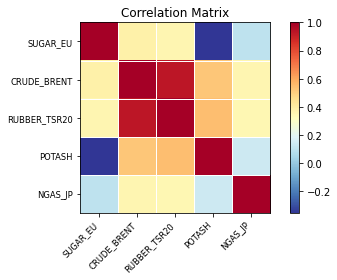

In [114]:
# The correlation matrix in color
corr=data_analyzed.corr()
sm.graphics.plot_corr(corr, xnames=list(corr.columns))

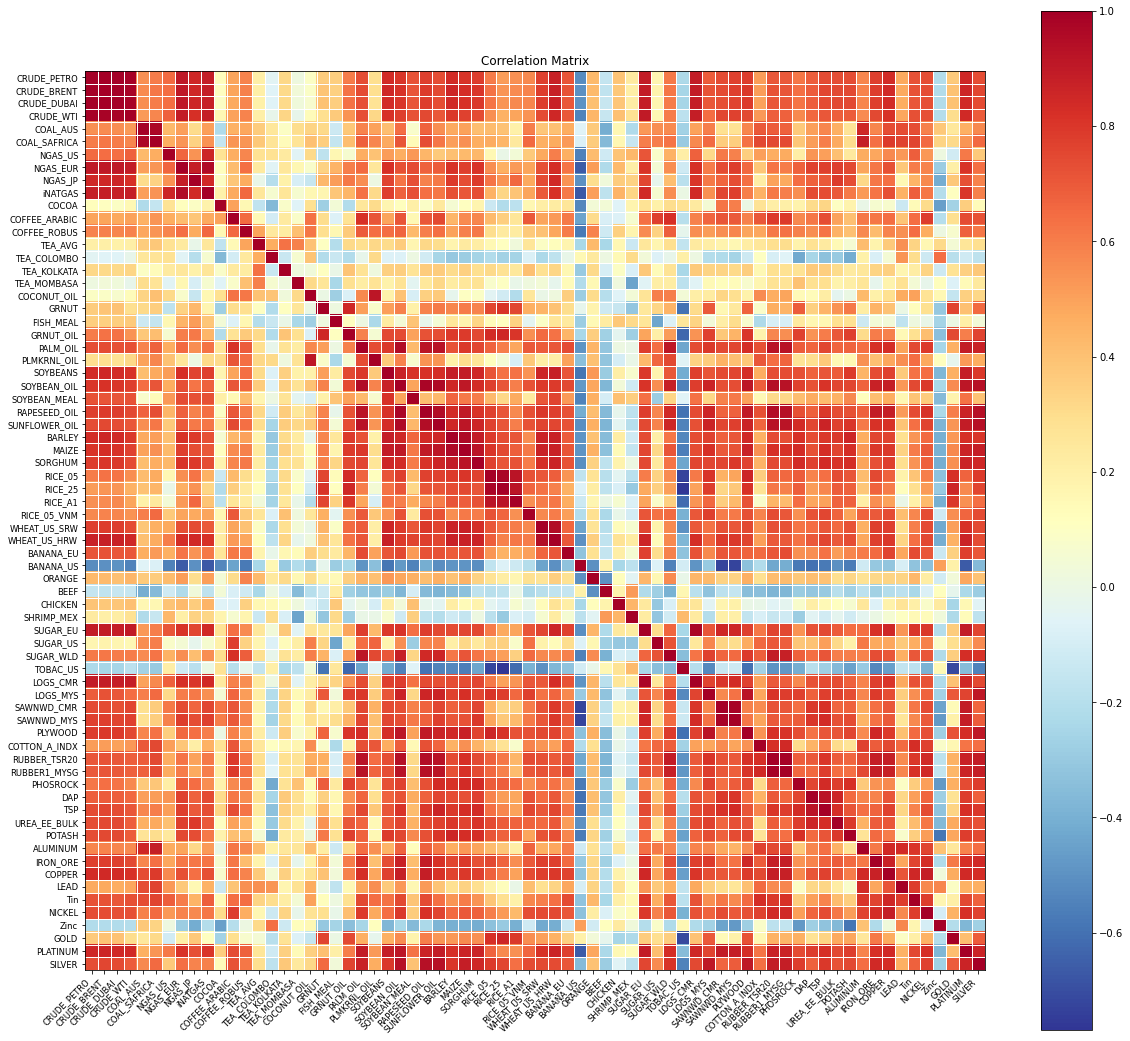

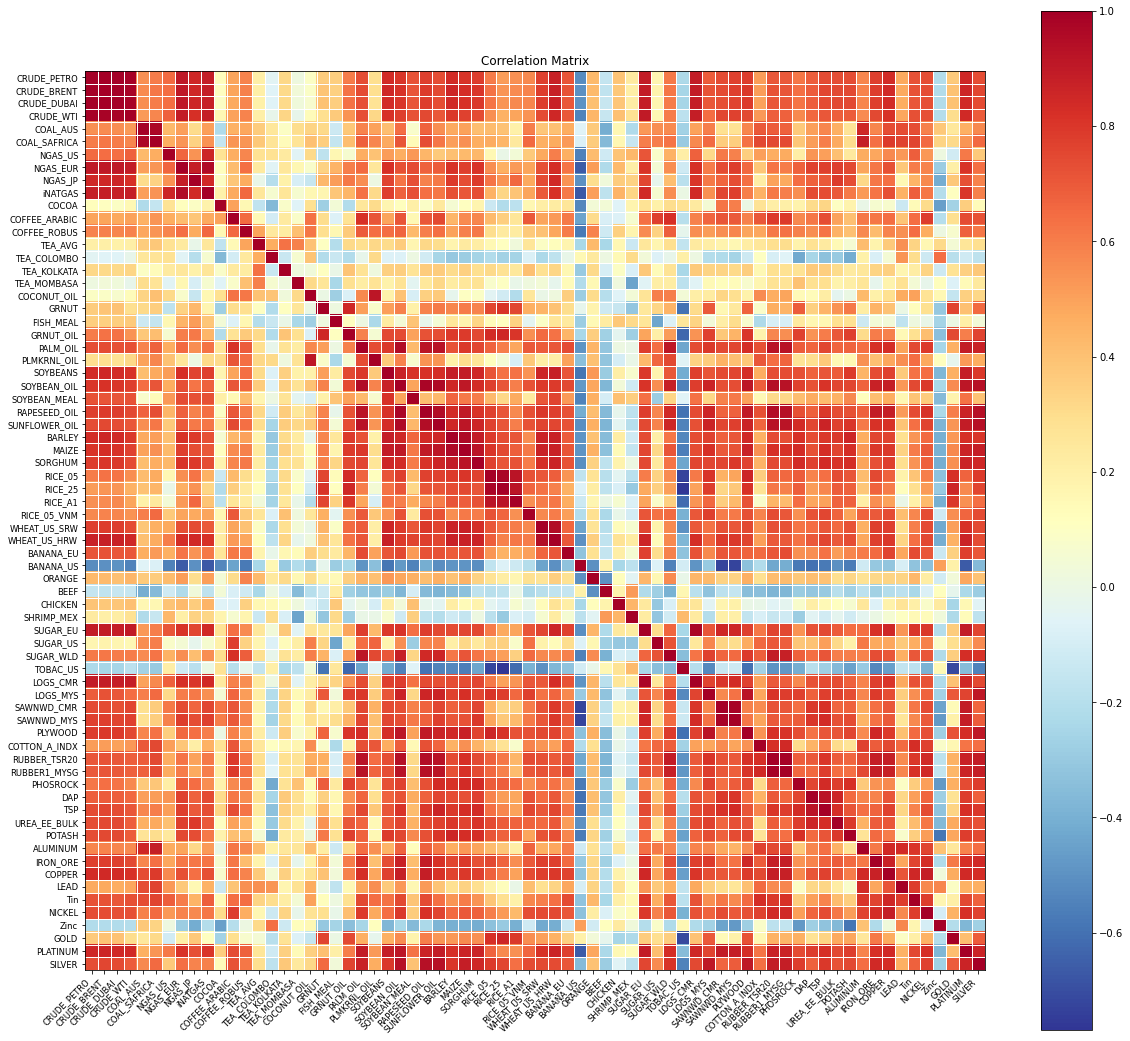

In [117]:
# the whole correlation matrix
rcParams['figure.figsize'] = [17, 15]        # a bigger plot
corr=dataselected.corr()
sm.graphics.plot_corr(corr, xnames=list(corr.columns))


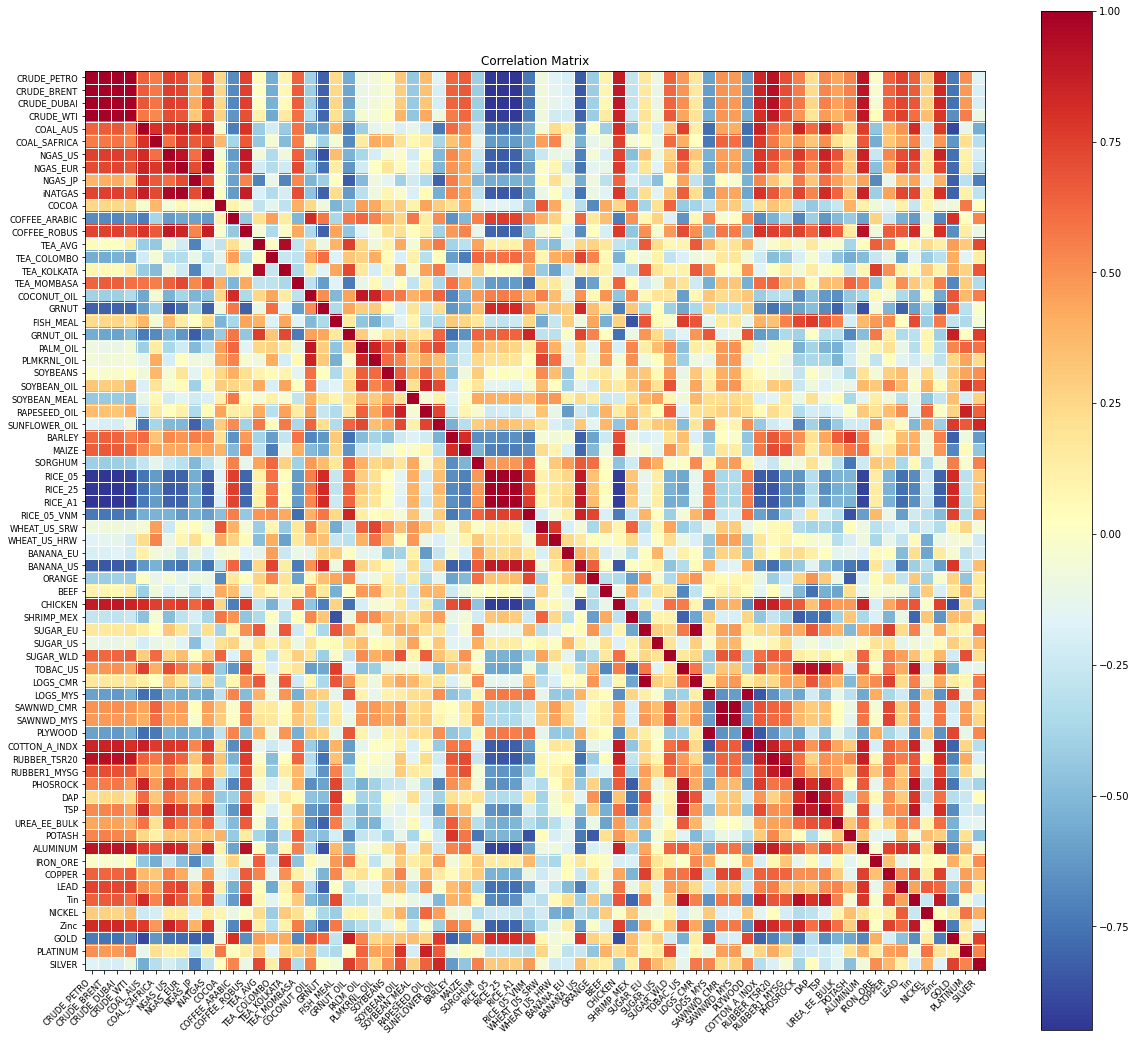

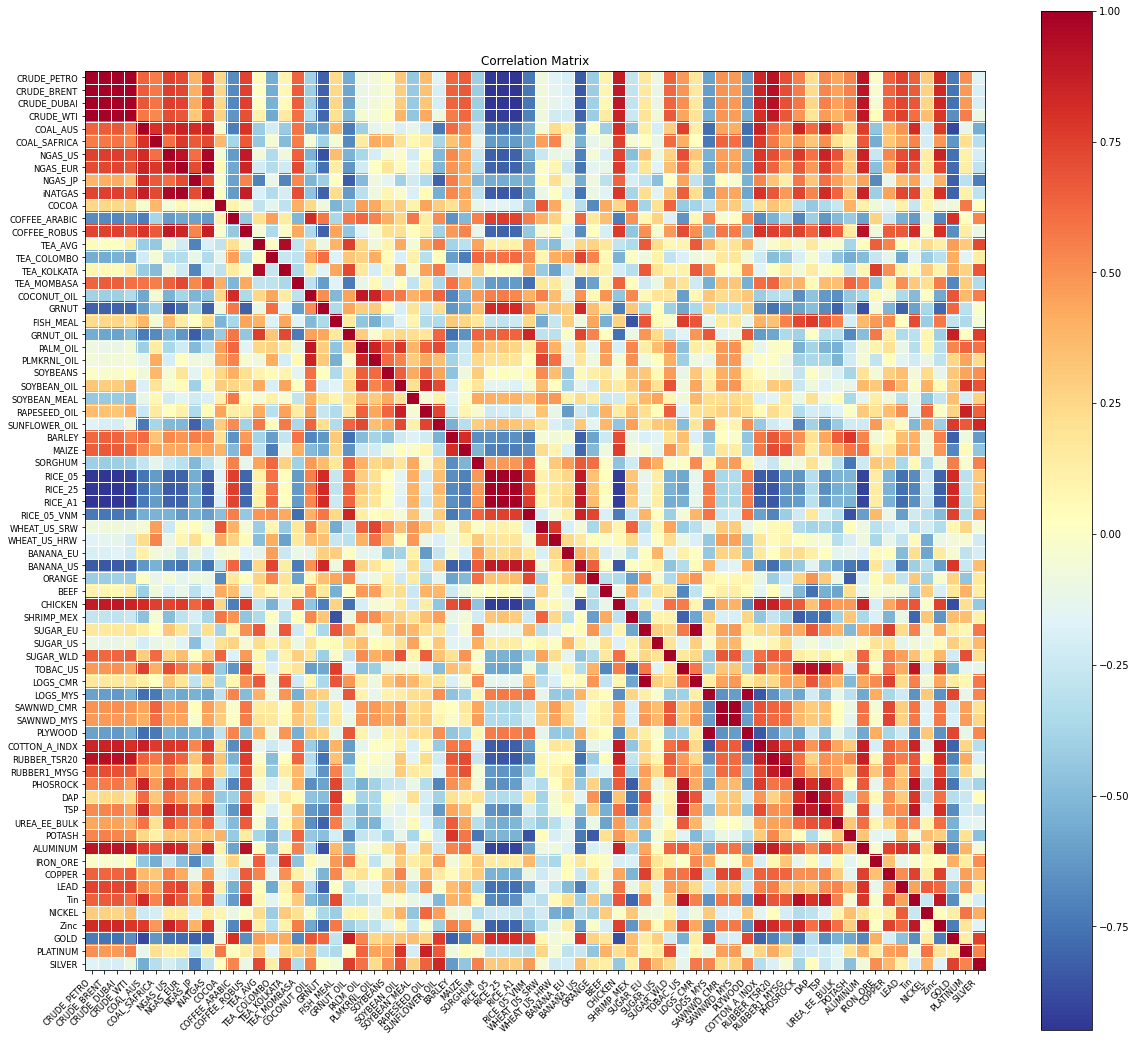

In [119]:
# the whole correlation with timeslices
corr=dataselected[-20:][:].corr()
sm.graphics.plot_corr(corr, xnames=list(corr.columns))